# Sesión 5. Galería de flujos de caja

Los flujos de caja pueden ser muy diferentes en la práctica: desde los totalmente predecibles a corto plazo como los totalmente aleatorios. Lo más probable es que nos encontremos con flujos de caja de todo tipo. Por lo tanto, conviene saber como generar diferentes flujos de caja para por simular un amplio rango de posibles situaciones. Para ello utilizaremos las **list comprehensions** que es una funcionalidad de Python para generar listas de manera sencilla.

In [1]:
# Importamos librerías
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Flujo de caja seguro y constante. Damos valores a horizonte P = 5 y constante k = 2.5 y f = [k for i in range(P)]
P = 5
k = 2.5
f = [k for i in range(P)]
f

[2.5, 2.5, 2.5, 2.5, 2.5]

In [3]:
# Flujo de caja seguro y creciente m =1.5 y ][m * i for i in range(P)]
m = 1.5
f = [m * i for i in range(P)]
f

[0.0, 1.5, 3.0, 4.5, 6.0]

In [4]:
# Flujos aleatorios normales a partir de mu = 0 y sigma = 1
mu = 0
sigma = 1
f = np.random.normal(mu, sigma, P)
f

array([-0.22802965, -1.62621787,  0.15356469,  1.13968174, -0.06916363])

**Ejercicio**. Generar y representar el saldo bancario para tres flujos aleatorios con media -1, 0, 1 y std = 2 a partir de un saldo inicial b0 = 0 para 100 periodos de tiempo.

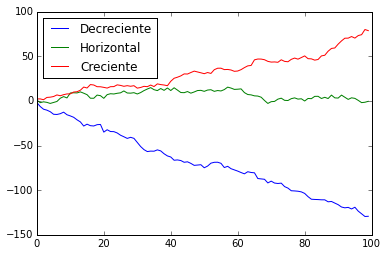

In [7]:
# Generar y representar el saldo bancario para tres flujos aleatorios normales con media -1, 0, 1 y std = 1
# Datos iniciales mu1=-1, mu2=0, mu3 =1, sigma = 2, P = 100
mu1 = -1
mu2 = 0
mu3 = 1
sigma = 2
P = 100
b0 = 0
# Flujos f1, f2, f3 y acumulados b1, b2, b3 = b0 + np.cumsum(f3)
f1 = np.random.normal(mu1, sigma, P)
f2 = np.random.normal(mu2, sigma, P)
f3 = np.random.normal(mu3, sigma, P)
b1 = b0 + np.cumsum(f1)
b2 = b0 + np.cumsum(f2)
b3 = b0 + np.cumsum(f3)
# Plot t = range(P), plot(t, b1, label='Decreciente')
t = range(P)
plt.plot(t, b1, label ='Decreciente')
plt.plot(t, b2, label ='Horizontal')
plt.plot(t, b3, label ='Creciente')
plt.legend(loc='upper left')
plt.show()

**Flujos de caja con precisión controlada**

Previsión = una estimación del valor de una variable $f_t$ en un instante t, y la representaremos por $\hat{f}_t$

Error = la desviación de la previsión respecto del valor real de la variable $e_t = f_t - \hat{f}_t$

Con frecuencia se asume que el error sigue una distribución normal con media cero y una determinada desviación típica: $\mathcal{N}(0,\sigma_e)$

Por tanto a partir de un flujo de caja podemos simular el impacto del error de previsión sumando una variable normal con desviación típica controlada al flujo de caja disponible.

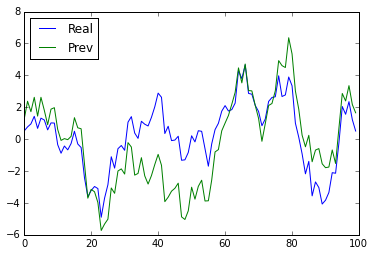

In [12]:
# Generar y representar un saldo aleatorio real de media 0 y sigma = 1 y una previsión con un error de sigma_e = 0.5
# Partimos de b0 = 0 y P = 100, mu =0, sigma=1, sigma_e = 0.5
b0 = 0
P = 100
mu = 0
sigma = 1
sigma_e = 0.5
# Creamos flujo real y error, y luego prev = real - error
real = np.random.normal(mu, sigma, P)
error = np.random.normal(mu, sigma_e, P)
prev = real - error
# Finalmente breal y bprev = b0 + np.cumsum(prev) y representamos.
breal = b0 + np.cumsum(real)
bprev = b0 + np.cumsum(prev)
plt.plot(t, breal, label='Real')
plt.plot(t, bprev, label='Prev')
plt.legend(loc = 'upper left')
plt.show()

** Ejercicio: ** Representa gráficamente el error y calcula su valor medio y máximo en valor absoluto.

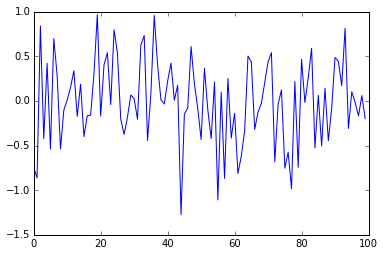

In [14]:
# Propuesta de resolución del ejercicio
plt.plot(t, error)
plt.show()

## Elaboración de un plan de tesorería de tus finanzas personales

Vamos a pensar que dispones de una cuenta corriente que llamaremos cuenta 1 a través de la cual recibes ingresos y realizas pagos. Como quieres sacar partido a los excedentes de tesorería también has contratado una cuenta de inversión que llamaremos cuenta 2. Pero como no te gusta correr riesgos, solo utilizas la cuenta 2 para comprar deuda pública que te ofrece rentabilidad anual del 5%. En esta situación, te planteas qué cantidad debes mantener en la cuenta 1 para hacer frente a los pagos habituales y qué cantidad debes transferir cada mes a la cuenta 2 para conseguir la rentabilidad indicada.

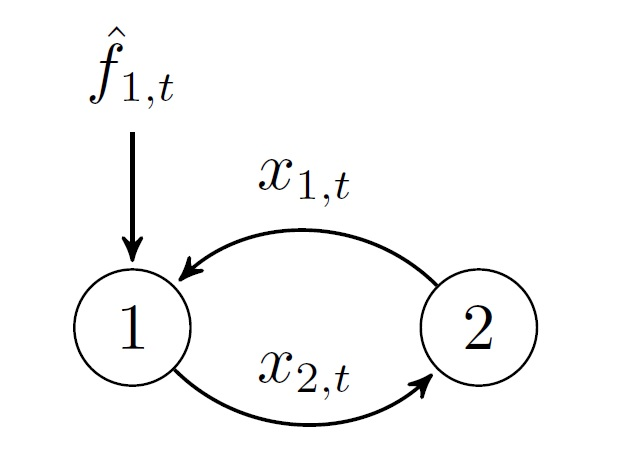

In [15]:
from IPython.display import Image
Image(filename = "twoassets.jpg", embed = True, width = 500, height = 500)

Transferir cualquier importe desde la cuenta 1 a la 2 tiene un coste fijo de 20 €, y transferir desde la cuenta 2 a la 1 tiene un coste de 10 € por comisiones fijas y gastos administrativos. Como la rentabilidad anual que se obtiene de los importes depositados en la cuenta 2 es del 5%, la traducción a costes es fijar un coste de mantenimiento de excedentes de tesorería en la cuenta 1 del 5%. Los costes variables de transacción son del 0.1% y del 1% para las transacciones $x_{1,t}$ y $x_{2,t}$ respectivamente. Considera que los saldos iniciales son 6000 para la cuenta 1 y 1000 para la cuenta 2.

In [16]:
# Estructura de costes y saldos iniciales g01 = 10, g02=20, g11 = 0.001, 
# g12 = 0.01, v1 = 0.05/12, v2 = 0, b01 =6000, b02 =1000
g01 = 10
g02 = 20
g11 = 0.001
g12 = 0.01
v1 = 0.05/12
v2 = 0
b01 = 6100
b02 = 1000

Asumamos también que eres lo suficientemente afortunado como para disfrutar de un contrato fijo y de un salario neto mensual de 2000 €. Añadamos a esto el hecho de que cada mes tienes que hacer frente al pago de tu hipoteca por valor de 500 €. Estos dos flujos de entrada (salario) y de salida (hipoteca) son los dos únicos flujos de caja que conoces con seguridad. El resto de flujos de caja son principalmente gastos de electricidad, agua, gas, telefonía y ocio cuyo importe mensual no conoces con certeza. Supongamos que, del análisis de los datos históricos de tu cuenta, sabes que la media de los gastos mensuales es de 500 € y que la desviación típica es de 100 €. Por tanto, tu flujo de caja mensual queda caracterizado por un componente seguro (determinista) y otro aleatorio (estocástico) equivalente a:

$$f_{1,t} = 2000 - 500 + \mathcal{N}(-500,100) = \mathcal{N}(1000,100)$$

In [18]:
# Fijamos seed(1), P = 12 y generamos f1 con flujos normales (1000, 100, size = P )
np.random.seed(1)
P = 12
f1 = np.random.normal(1000, 100, P)
f1

array([ 1162.43453637,   938.82435863,   947.18282477,   892.70313778,
        1086.54076293,   769.84613031,  1174.48117642,   923.87930991,
        1031.90390961,   975.06296245,  1146.2107937 ,   793.98592905])

**Ejercicio.** Propón tu mejor plan de tesorería mensual para los próximos 12 meses sabiendo que el saldo inicial es de 6000 € para la cuenta 1 y 1000 € para la cuenta 2. Determina cuáles son las transacciones $x_{1,t}$ y $x_{2,t}$ a realizar cada mes, representa gráficamente el saldo mensual de las cuentas 1 y 2, determina el saldo medio mensual y su desviación típica, y finalmente, calcula los costes totales esperados de tu plan de tesorería.

** Plan 1 **. Vamos a mantener el saldo inicial de 6000 € y cada mes realizaremos un transferencia de 1000 € de la cuenta 1 a la cuenta 2, debido a que el flujo de caja esperado sobre la cuenta 1 es positivo y de media 1000.

In [19]:
# Generamos x1 igual a ceros de longitud P y x2 = 1000 for i in range(P)
x2 = np.array([1000 for i in range(P)])
x1 = np.zeros(P)
x1, x2

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
        1000]))

In [20]:
# Calculamos b1 a partir del saldo inicial b01 + np.cumsum(f1) + np.cumsum(x1) - np.cumsum(x2)
# Calculamos b2 a partir del saldo inicial b02 - np.cumsum(x1) + np.cumsum(x2)
# Presentamos los saldos medios previstos con print('Saldo medio 1 =', np.mean(b1))
b1 = b01 + np.cumsum(f1) + np.cumsum(x1) - np.cumsum(x2)
b2 = b02 - np.cumsum(x1) + np.cumsum(x2)
b2

array([  2000.,   3000.,   4000.,   5000.,   6000.,   7000.,   8000.,
         9000.,  10000.,  11000.,  12000.,  13000.])

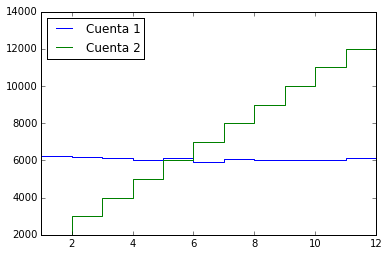

In [23]:
# Representamos saldos b1 y b2 por período con función plt.step(t, b1, where = 'post', label = 'Cuenta 1')
# Primero creamos un rango t = range(1, P+1) para que los meses vayan del 1 al 12
# Ajustamos límites eje horizontal [1,12] y vertical [0,15000] presentamos leyenda Cuenta1 y Cuenta2
t = range(1, P + 1)
plt.step(t, b1, where='post', label = 'Cuenta 1')
plt.step(t, b2, where='post', label = 'Cuenta 2')
plt.xlim([1,12])
plt.legend(loc='upper left')
plt.show()

El coste de transacción tiene una parte fija $\gamma_0$ y una parte variable $\gamma_1$ que es proporcional a la transacción $x_t$: 


$$ \Gamma(x_t) = \left\{\begin{array}{lll} \gamma_0 + \gamma_ 1 \cdot x_t & \mbox{si} & x_t > 0 \\ 0 & \mbox{si} & x_t = 0 \\ \gamma_0 - \gamma_ 1 \cdot x_t & \mbox{si} & x_t < 0 \end{array}\right.$$

Podemos transformar esta función de costes en su versión lineal utilizando vectores:

$$\Gamma(x_t) = \gamma_0^T \cdot z_t + \gamma_1^T \cdot x_t$$

donde $z_t$ es una variable auxiliar binaria que toma valor 1 cuando $x_t>0$ o cero cuando $x_t=0$.

In [27]:
# Para calcular los costes fijos podemos transformar las variables reales de x1, x2
# en binarias z1, z2 mediante la función sign(x1) 
z1 = np.sign(x1)
z2 = np.sign(x2)


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [28]:
# Y el coste fijo de la transacción x2 multiplicando z2 por g02 y sumando elementos del vector
np.sum(z2 * g02)

240

In [33]:
# Ahora calculamos el trans cost como la suma de np.sum(g01*z1 + g11*x1 + g02*z2 + g12*x2)
costetrans = np.sum(g01 * z1 + g02 * z2 + g11 * x1 + g12 * x2)
# Y el coste de mantenimiento como la suma de v1*b1 + v2*b2
costeman = np.sum(v1 * b1 + v2 * b2)
# El total sera costetrans + coste man
total = costetrans + costeman
# Presentamos coste trans, coste man y coste total con print('Coste total =', int(total), 'euros')
print('Coste trans =', int(costetrans), 'euros')
print('Coste manteniento =', int(costeman), 'euros')
print('Coste total =', int(total), 'euros')

Coste trans = 360 euros
Coste manteniento = 303 euros
Coste total = 663 euros


** Plan 2. ** Modelo de Miller-Orr. Para establecer el Plan 2, primero calcularemos los límites de control $H$ y $Z$ para la cuenta 1 a partir de las fórmulas que proponen. El límite $L$ lo fijaremos a un valor tres veces la desviación típica de los flujos de caja previstos, es decir, $L=300$, para que la probabilidad de un saldo negativo sea inferior a 0.01.

$$ L = 3 \sigma $$

$$ Z = L + \sqrt[3]{\frac{3 \gamma_0 \sigma^2}{v^+}} $$

$$ H = 3Z - 2L $$

In [34]:
# Valores iniciales para sigma = 100, g01 = 10, y v1 = 0.05/12 y calculamos H, Z, L
sigma = 100
g01 = 10
v1 = 0.05/12
L = 3 * sigma
Z = L + ((3 * g01 * sigma ** 2)/v1) **(1/3)
H = 3*Z - 2*L
H, Z, L

(1548.050293831142, 716.0167646103807, 300)

In [35]:
# Definimos la función transfer del modelo de Miller-Orr a partir de h, z, l y saldo inicial s
def transfer(h, z, l, s):
    if s > h or s < l:
        x = z - s
    else:
        x = 0
    return(x)

In [ ]:
Image(filename = "twoassets.jpg", embed = True, width = 500, height = 500)

Y ahora calculamos el plan 2 a partir de la función **transfer** devuelve las transacciones netas sobre la cuenta 1 por lo que habrá que tener en cuenta los signos como veremos en el ejemplo para un saldo inicial de b01 = 6000.

In [40]:
transfer(H, Z, L, 1700)

-983.9832353896193

In [44]:
# Creamos listas vacías plan2 y b1 y fijamos b01 = 6000
plan2 = []
b1 = []
b01 = 6000
# Fijamos inibal = b01 y para cada elem de f calculamos x y lo añadimos a plan2
inibal = b01
for elem in f1:
    x = transfer(H, Z, L, inibal)
    plan2.append(x)
    bal = inibal + x + elem
    b1.append(bal)
    inibal = bal
# Calculamos bal y lo añadimos a b1 y actualizamos inibal
plan2

[-5283.983235389619,
 -1162.4345363663244,
 -938.82435863499245,
 -947.18282477365437,
 -892.70313778438299,
 -1086.5407629324679,
 0,
 -1944.3273067336197,
 -923.87930991048984,
 -1031.9039096057099,
 -975.06296245225894,
 -1146.2107937044975]

In [ ]:
# Presentamos plan2


In [45]:
# Como todos los valores de plan 2 son negativos x1 = np.zeros(P) y x2 = - 1*np.array(plan2)
x1 = np.zeros(P)
x2 = -1*np.array(plan2)
# Transformamos b1 en un array y calculamos b2  como b02 - np.cumsum(x1) + np.cumsum(x2)
b1 = np.array(b1)
b2 = b02 - np.cumsum(x1) + np.cumsum(x2)
#  print('Saldo medio 1 =', int(np.mean(b1))) para b1 y b2
b2

array([  6283.98323539,   7446.41777176,   8385.24213039,   9332.42495516,
        10225.12809295,  11311.66885588,  11311.66885588,  13255.99616262,
        14179.87547253,  15211.77938213,  16186.84234458,  17333.05313829])

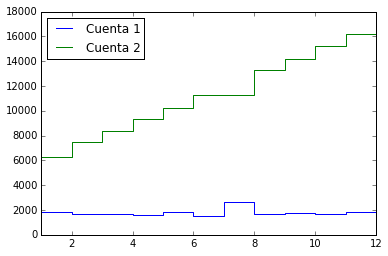

In [46]:
# Representamos saldos b1 y b2 por período con función plt.step(t, b1, where = 'post', label = 'Cuenta 1')
# Primero creamos un rango t = range(1, P+1) para que los meses vayan del 1 al 12
# Ajustamos límites eje horizontal [1,12] y presentamos leyenda Cuenta1 y Cuenta2
t = range(1, P + 1)
plt.step(t, b1, where='post', label = 'Cuenta 1')
plt.step(t, b2, where='post', label = 'Cuenta 2')
plt.xlim([1,12])
plt.legend(loc='upper left')
plt.show()

In [47]:
# Ahora calculamos el trans cost como la suma de np.sum(g01*z1 + g11*x1 + g02*z2 + g12*x2)
costetrans = np.sum(g01 * z1 + g02 * z2 + g11 * x1 + g12 * x2)
# Y el coste de mantenimiento como la suma de v1*b1 + v2*b2
costeman = np.sum(v1 * b1 + v2 * b2)
# El total sera costetrans + coste man
total = costetrans + costeman
# Presentamos coste trans, coste man y coste total con print('Coste total =', int(total), 'euros')
print('Coste trans =', int(costetrans), 'euros')
print('Coste manteniento =', int(costeman), 'euros')
print('Coste total =', int(total), 'euros')

Coste trans = 403 euros
Coste manteniento = 88 euros
Coste total = 491 euros


Como se puede comprobar, el coste del plan propuesto por modelo de Miller-Orr es menor que nuestro primer plan.

# Bibliografía recomendada

** Python **

- Hilpisch, Y. (2014). Python for Finance: Analyze Big Financial Data. O'Reilly Media, Inc.

- McKinney, W. (2012). Python for data analysis: Data wrangling with Pandas, NumPy, and IPython. O'Reilly Media, Inc.

** Gestión de tesorería **

- Ross, S. A. W., Jaffe, R. W., Ross, J. F. S. A., Westerfield, R. W., & Jaffe, J. F. (2009). Finanzas corporativas/Corporate finance. McGraw-Hill.

- Brealey, R. A., Myers, S. C., Allen, F., & Mohanty, P. (2012). Principles of corporate finance. McGraw-Hill Education.

y también el manual de que hemos seguido en estas clases.

- Salas-Molina, F. & Pla-Santamaría, D. (2017). Gestión de tesorería con Python. Colección Academica. Editorial Universitat Politècnica de València.

En el Capítulo 4, se describe cómo utilizar un módulo específico de Python para obtener planes de tesorería óptimos utilizando programación lineal entera mixta. Para ello, es necesario descargar e instalar un módulo adicional de programación lineal para Python desarrollado por Gurobi (www.gurobi.com). 

En el Capítulo 5, se hace una introducción a la previsión de series temporales con Python. En este caso, el procedimiento recomendado es primero estudiar los datos desde un punto de vista estadísco, luego elegir un modelo de previsión como la regresión lineal, los modelos autoregresivos o también modelos no lineales como los árboles de decisión. Finalmente, conviene calcular el error cometido y comparar diferentes modelos.

**Ejercicio de evaluación**